In [2]:
import hashlib

def generate_hash(word, type='md5'):
    h = hashlib.new(type)
    h.update(word)
    return h.hexdigest()

['sha3_256', 'sha3_384', 'sha3_512', 'sha512', 'md5', 'sha384', 'sha256', 'sha224', 'sha3_224', 'sha1']
algo: sha3_256, file: maly_pingwinek.png, time: 0.0009645000100135803
algo: sha3_256, file: sredni_pingwinek.png, time: 0.000826000003144145
algo: sha3_256, file: duzy_pingwinek.png, time: 0.007864700048230588
algo: sha3_384, file: maly_pingwinek.png, time: 0.0004350000526756048
algo: sha3_384, file: sredni_pingwinek.png, time: 0.0009527999209240079
algo: sha3_384, file: duzy_pingwinek.png, time: 0.009512900025583804
algo: sha3_512, file: maly_pingwinek.png, time: 0.0004862999776378274
algo: sha3_512, file: sredni_pingwinek.png, time: 0.000954599934630096
algo: sha3_512, file: duzy_pingwinek.png, time: 0.013706899946555495
algo: sha512, file: maly_pingwinek.png, time: 0.0006507999496534467
algo: sha512, file: sredni_pingwinek.png, time: 0.00025319994892925024
algo: sha512, file: duzy_pingwinek.png, time: 0.0023509999737143517
algo: md5, file: maly_pingwinek.png, time: 0.0005358000053

<Axes: >

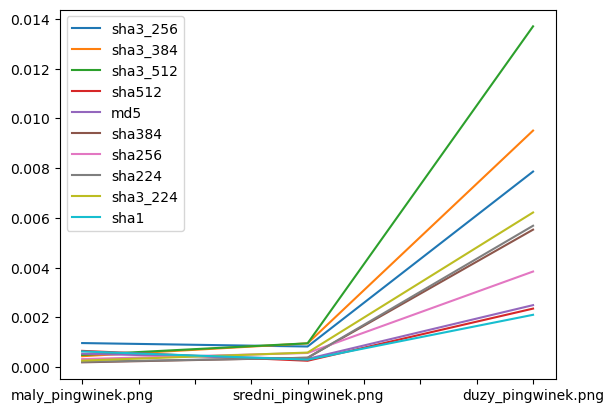

In [5]:
import time
import numpy as np
import pandas as pd

files = ['maly_pingwinek.png', 'sredni_pingwinek.png', 'duzy_pingwinek.png']
algos = list(hashlib.algorithms_guaranteed)
algos = [algo for algo in algos if not algo.startswith(('shake', 'blake'))]
print(algos)
df = pd.DataFrame(index=files, columns=algos)
df.fillna(0)

for algo in algos:
    for file in files:
        with open('..\\zad4\\'+file, 'rb') as f:
            content = f.read()
            t0 = time.perf_counter()
            generate_hash(content, algo)
            t1 = time.perf_counter()
            df.at[file, algo] = t1-t0
            print('algo: {}, file: {}, time: {}'.format(algo, file, t1-t0))
   
print(df)     
df.plot()
    

In [2]:
def to_bin_str(h: str):
    n = int(h, base=16)
    return format(n, 'b')

In [6]:
from collections import Counter
import math

counter = Counter()
n = 10
b_len = math.ceil(n/8)
k = 12

for i in range(2**n):
    b = i.to_bytes(length=b_len)
    hash = generate_hash(b)
    b_hash = to_bin_str(hash)[:12]
    counter[b_hash] += 1
    
print(counter.most_common(1))

[('101010111001', 4)]


In [7]:
h1 = generate_hash('very_secure_password1'.encode())
h2 = generate_hash('very_secure_password3'.encode())
b1 = to_bin_str(h1)
b2 = to_bin_str(h2)
changed = 0
same = 0
for s1, s2 in zip(b1, b2):
    if s1 == s2:
        same += 1
    else:
        changed += 1
        
print(same, changed)

67 60
